In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [122]:
#Load data
train = pd.read_csv('train.csv')
y = train['SalePrice']
train.drop(['Id'],axis = 1,inplace = True)
test = pd.read_csv('test.csv')

In [123]:
#check where are Nan Values
def nan_cols(df):
    columns_nan = df.isna().sum()
    nan_val = columns_nan.where(columns_nan > 0).dropna()
    return list(nan_val.index)
nan_col = nan_cols(train)

In [124]:
## INITIAL EDA
#Separate categorical and non categorical data and get where are the nan values in each one
def separate_data(df):
    categorical = [num for num in df.columns if df.dtypes[num] == 'object']
    numerical = [num for num in df.columns if df.dtypes[num] != 'object']
    
    nan_categorical = [cat for cat in nan_col if df.dtypes[cat] == 'object']
    nan_numerical = [na for na in nan_col if df.dtypes[na] != 'object']
    return categorical,numerical, nan_numerical,nan_categorical
categorical, numerical, nan_numerical,nan_categorical = separate_data(train)
#categorical_test,numerical_test,nan_numerical_test, nan_categorical_test = separate_data(test)
#nan_numerical_test, nan_categorical_test

In [125]:
##Plot histogram, boxplot and scatter plot(column and house price)
def numerical_plot(df,numerical):
    for col in numerical:
        plt.figure(figsize = (15,4))
        plt.subplot(131)
        sns.histplot(df[col],kde = True)
        plt.subplot(132)
        sns.boxplot(x = df[col])
        plt.subplot(133)
        sns.scatterplot(x=df[col],y = y)
        plt.title(col)
        plt.show() 
#numerical_plot(train,numerical)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


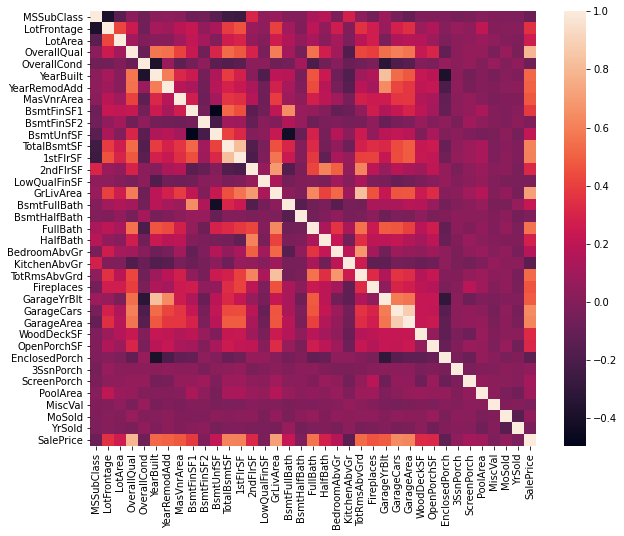

In [126]:
#CORRELATION MATRIX, HEAT MAP AND DATA DESCRIPTION (NUMERICAL)
corr_matrix = train.corr()
corr_matrix['SalePrice'].sort_values()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix)
train.describe()


In [127]:
#PLOT CATEGORICAL DATA AS BARCHARTS
def categorical_plot(df,categorical):   
    for col in categorical:
        data = df[col].value_counts()
        for na in nan_categorical:
            if col == na:
                no_val=df[na].isna().value_counts().rename({True: 'Na value', False : '0'})                
                data = data.append(no_val)
                data = data.drop('0')
        data.plot.bar()
        plt.title(col)
        plt.show()
#categorical_plot(train,categorical)

In [131]:
##DATA CLEANING


In [190]:
#NUMERICAL NANs
def numerical_nan(df):
    df['LotFrontage'].fillna(df['LotFrontage'].mean(),inplace = True)
    df['MasVnrArea'].fillna(df['MasVnrArea'].median(),inplace = True)
    df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean(),inplace = True)
numerical_nan(train)      

In [191]:
#Categorical NaN

def categorical_missing_None(df):
    df['Electrical'].fillna('SBrkr',inplace = True) #-----> Since SBrkr is the most common value and there is only one NAN
    df['MasVnrType'].replace({'None': 0},inplace =True)#----> Since None represents the absence of Masonry
categorical_missing_None(train)

In [197]:
def categorical_nan_func(df,nan_categorical):
    for col in nan_categorical:
        df[col].fillna(0,inplace = True)
categorical_nan_func(train,nan_categorical)        

In [207]:
def oneHot(df,categorical):
    

1460